### Pymc3 

In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running Ubuntu 18.10 and using:
Python 3.6.7
IPython 7.2.0
PyMC3 3.6
NumPy 1.15.4
SciPy 1.2.0
Matplotlib 2.2.3



In [11]:
def land_water(success,trial,grid_points):
    x = np.linspace(0,1,grid_points)
    prior = np.repeat(5,grid_points)
    likelihood = stats.binom.pmf(n=trial, k=success, p=x)
    un_posterior = prior* likelihood
    posterior = un_posterior/np.sum(un_posterior)
    return posterior,x
    
    

Text(0,0.5,'Posterior Prob')

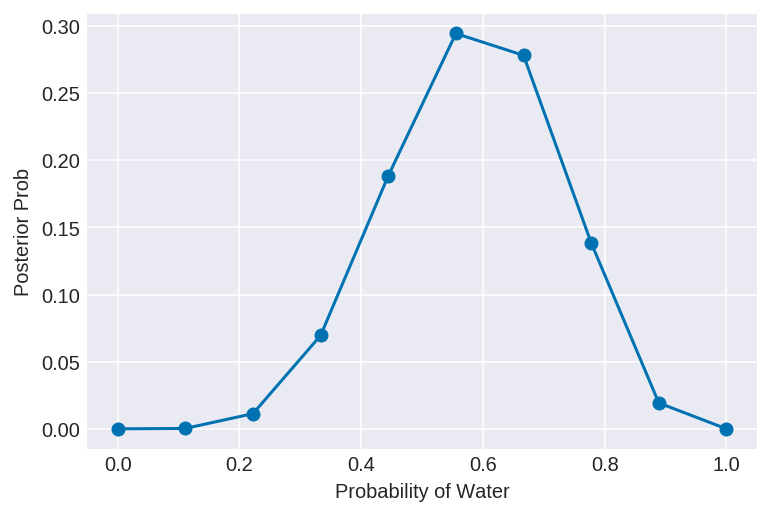

In [20]:

posterior,grid_point = land_water(6,10,10)

plt.plot(grid_point,posterior,'o-')
plt.xlabel("Probability of Water")
plt.ylabel("Posterior Prob")

Text(0,0.5,'Posterior Prob')

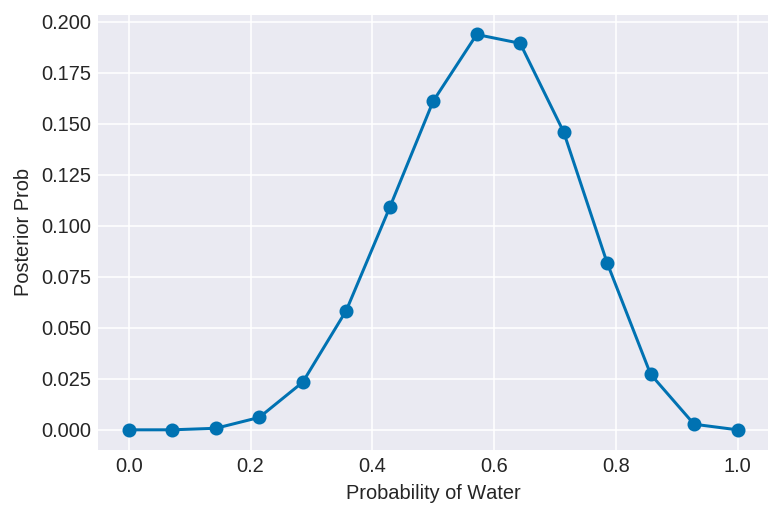

In [21]:

posterior,grid_point = land_water(6,10,15)

plt.plot(grid_point,posterior,'o-')
plt.xlabel("Probability of Water")
plt.ylabel("Posterior Prob")

In [22]:
data = np.repeat((0, 1), (3, 6))

In [33]:
with pm.Model() as quadratic_approx:
    
    p = pm.Uniform('p',0,1)
    w = pm.Binomial('w',p=p,n=len(data),observed= data.sum())
    mean_q =  pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean,std_q   
    
    
    

logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 1236.16it/s]


({'p_interval__': array(0.69314718), 'p': array(0.66666667)},
 array([0.15713484]))

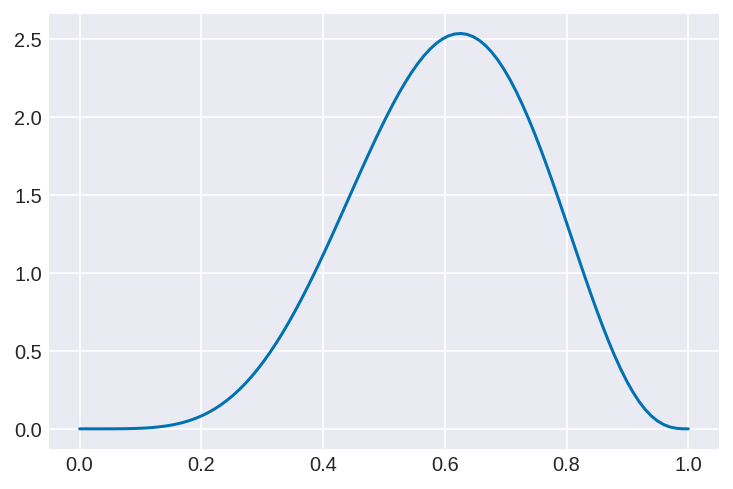

In [27]:
# real distribution
w = 6
n =9
x = np.linspace(0,1,100)
plt.plot(x,stats.beta.pdf(x,w,1+n-w),label="real posterior")

In [52]:

x = np.linspace(0,10,num=11)


In [11]:
with pm.Model() as model:
    x = pm.Normal('x',0,1)
    s = pm.sample(1000,tune=500 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2652.82draws/s]


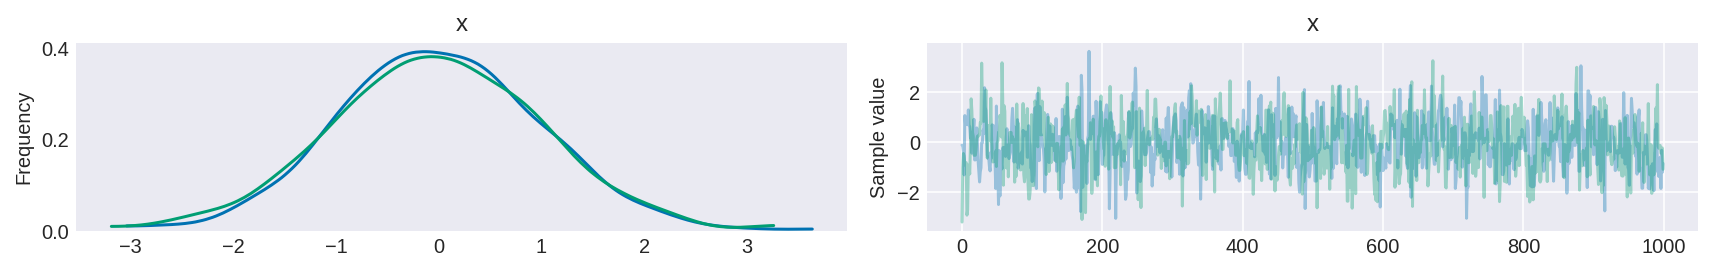

In [13]:
pm.traceplot(s);

In [23]:
list(filter(lambda x: x[0].isupper() ,dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CSG',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'Metropolis',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PoissonProposal',
 'SGFS',
 'SMC',
 'Slice']